# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [6]:
#importar a base de dados
import pandas as pd
dados = pd.read_csv("advertising.csv")
display(dados)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [9]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
print(dados.corr())

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


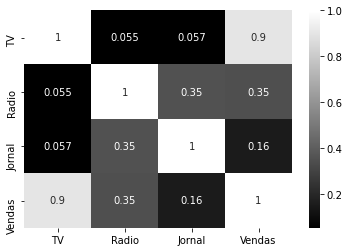

In [15]:
# criar um gráfico
sns.heatmap(dados.corr(),cmap="gray",annot=True)

# exibe o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [18]:
y = dados['Vendas']
x = dados[['TV','Radio','Jornal']]


from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [19]:


# importar int artf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#criar a int artf
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()


#one hot encoding, transformando texto em número e vice versa 
#treinar a int artf
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [21]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste,previsao_regressaolinear))
print(r2_score(y_teste,previsao_arvoredecisao))

0.9261922025652651
0.9771775327183212


#### Visualização Gráfica das Previsões

In [22]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste valor real'] = y_teste
tabela_auxiliar['Previsao Arvore Decisao'] = previsao_arvoredecisao
tabela_auxiliar['Previsao Regressao Linear'] = previsao_regressaolinear

display(tabela_auxiliar)

,y_teste,Previsao Arvore Decisao,Previsao Regressao Linear
46,10.6,11.543,10.725744
169,20.0,19.100,21.319963
168,17.1,17.838,19.010921
111,21.8,22.127,21.855267
81,17.3,17.296,18.291309
48,19.8,19.499,18.835101
22,5.6,6.409,7.211142
121,7.0,7.492,8.113761
34,11.9,13.080,10.122668
133,19.6,19.709,20.244276


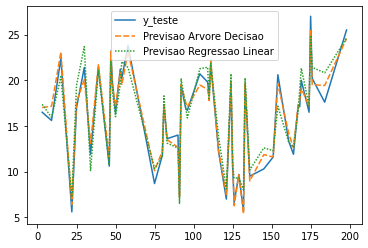

In [23]:
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [24]:
novatabela = pd.read_csv("novos.csv")
display(novatabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [26]:
previsao = modelo_arvoredecisao.predict(novatabela)
print(previsao)

[ 7.72   8.379 20.189]
